### Code to tabulate and visualise subjectivity sequence embedding experiment results

In [1]:
# import dependencies
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
# create dataframe using pickled subjectivity data
df = pd.read_pickle('/Users/chriswall/Desktop/repos/project_wallc_ds/tweet_data/pickled_datasets/subjectivity_data.pkl')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


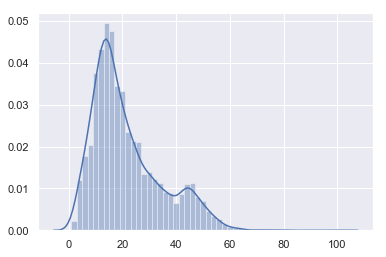

In [3]:
# compute distribution plot of tweet lengths using Seaborn
tweet_lengths = [len(tweet.split()) for tweet in df['preprocessed']]
sns.set(color_codes=True)
sns.distplot(tweet_lengths)

In [4]:
# go to the sequence embedding training logs directory 
os.chdir('/Users/chriswall/Desktop/repos/project_wallc_ds/sub_training/results_seq_emb/training_logs/')

In [5]:
# create regex expressions used to extract information from filenames
regexhl1 = re.compile(r'hl1_\d+_')
regexhl2 = re.compile(r'hl2_\d+_')
regexhl3 = re.compile(r'hl3_\d+_')
regexrun = re.compile(r'run_\d_')
regexdropout = re.compile(r'dr_\d.\d_')
regexrecdropout = re.compile(r'rc_\d.\d+_')
regexalldr = re.compile(r'alldr_\d.\d+_')

In [6]:
# create pandas dataframe to populate with network information and performance metrics
df = pd.DataFrame({'hl1': [], 'hl2': [], 'hl3': [], 'recurrent_dropout': [], 'dropout': [], 'run': [], 'max_acc': [], 'max_acc_at_epoch': [], 
                   'min_loss': [], 'min_loss_at_epoch': [], 'filetype': []})

In [7]:
# iterate through relevant training log files in directory extracting relevant information 
for filename in os.listdir():
    if (('0.0003' in filename) or ('0.0005' in filename)) and ('se200lg' not in filename):
        # pull all the parameters and the run number out of the filename using regex
        hl1 = regexhl1.findall(filename)[0]
        hl1 = hl1.replace('hl1', '')
        hl1 = hl1.replace('_', '')
        hl2 = regexhl2.findall(filename)[0]
        hl2 = hl2.replace('hl2', '')
        hl2 = hl2.replace('_', '')
        hl3 = regexhl3.findall(filename)[0]
        hl3 = hl3.replace('hl3', '')
        hl3 = hl3.replace('_', '')
        run = regexrun.findall(filename)[0]
        run = run.replace('run', '')
        run = run.replace('_', '')
        recdropout = regexrecdropout.findall(filename)
        dropout = regexdropout.findall(filename)
        alldropout = regexalldr.findall(filename)       
        if len(recdropout) > 0:
            recdropout = recdropout[0]
            recdropout = recdropout.replace('rc', '')
            recdropout = recdropout.replace('_', '')
        elif len(alldropout) > 0:
            recdropout = alldropout[0]
            recdropout = recdropout.replace('alldr', '')
            recdropout = recdropout.replace('_', '')
        if len(dropout) > 0:
            dropout = dropout[0]
            dropout = dropout.replace('dr', '')
            dropout = dropout.replace('_', '')
        else:
            dropout = recdropout
        if 'alldr' in filename:
            filetype = 'alldr'
        elif 'rc' in filename:
            filetype = 'rc'
            
        dframe = pd.read_csv(filename)
        max_acc = dframe['val_accuracy'].max()
        max_acc_at_epoch = dframe[dframe['val_accuracy'] == max_acc]['epoch'].values
        min_loss = dframe['val_loss'].min()
        min_loss_at_epoch = dframe[dframe['val_loss'] == min_loss]['epoch'].values
        
        df = df.append({'hl1': int(hl1), 'hl2': int(hl2), 'hl3': int(hl3), 'recurrent_dropout': recdropout, 'dropout': dropout, 'run': int(run), 'max_acc': max_acc, 
                   'max_acc_at_epoch': max_acc_at_epoch, 'min_loss': min_loss, 
                   'min_loss_at_epoch': min_loss_at_epoch, 'filetype': filetype}, ignore_index = True)             

In [8]:
# sort dataframe by accuracy values and print selecting only networks using 0.45 dropout and recurrent dropout
df = df.loc[(df['recurrent_dropout'] == '0.45') & (df['dropout'] == '0.45')]
df = df.sort_values('max_acc', ascending=False)
df

,hl1,hl2,hl3,recurrent_dropout,dropout,run,max_acc,max_acc_at_epoch,min_loss,min_loss_at_epoch,filetype
17,32.0,64.0,0.0,0.45,0.45,1.0,0.841346,[404],0.457089,[49],alldr
47,128.0,32.0,0.0,0.45,0.45,1.0,0.833333,[217],0.445946,[48],rc
22,64.0,64.0,0.0,0.45,0.45,0.0,0.833333,[308],0.449955,[50],rc
46,32.0,64.0,0.0,0.45,0.45,0.0,0.831731,[300],0.436858,[111],rc
29,32.0,64.0,0.0,0.45,0.45,1.0,0.830128,[229],0.434660,[85],rc
15,24.0,24.0,0.0,0.45,0.45,0.0,0.830128,"[398, 420]",0.443167,[119],alldr
34,128.0,16.0,0.0,0.45,0.45,0.0,0.830128,[327],0.444327,[60],rc
24,128.0,32.0,16.0,0.45,0.45,0.0,0.830128,[330],0.442352,[58],alldr
49,128.0,16.0,0.0,0.45,0.45,1.0,0.828526,[339],0.449662,[48],rc
8,32.0,32.0,0.0,0.45,0.45,0.0,0.828526,[301],0.456671,[91],rc


In [9]:
# calculate accuracy mean and standard deviation
accs = np.array(df['max_acc'])
mean_accs = np.mean(accs)
print(mean_accs)
std_accs = np.std(accs)
print(std_accs)

0.820779915
0.008625936251868298


Text(0.5, 0, 'Accuracy')

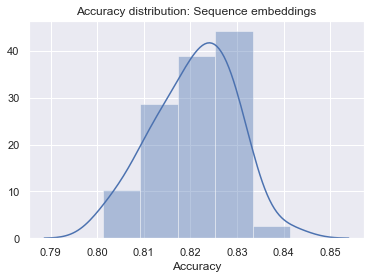

In [10]:
# compute accuracy distribution graph using Seaborn
sns.set(color_codes=True)
sns.distplot(df['max_acc'], norm_hist=False, bins=5)
plt.title('Accuracy distribution: Sequence embeddings')
plt.xlabel('Accuracy')

In [12]:
np.array(df['max_acc'])

array([0.84134614, 0.8333333 , 0.8333333 , 0.8317308 , 0.8301282 ,
       0.8301282 , 0.8301282 , 0.8301282 , 0.82852566, 0.82852566,
       0.8269231 , 0.8269231 , 0.8269231 , 0.8269231 , 0.8269231 ,
       0.82532054, 0.82532054, 0.82532054, 0.82371795, 0.82371795,
       0.82371795, 0.82211536, 0.82211536, 0.82211536, 0.82211536,
       0.82211536, 0.82051283, 0.81891024, 0.81891024, 0.81891024,
       0.81891024, 0.81891024, 0.8173077 , 0.8157051 , 0.8157051 ,
       0.8157051 , 0.8141026 , 0.8125    , 0.8125    , 0.8125    ,
       0.8125    , 0.8092949 , 0.8092949 , 0.8092949 , 0.8076923 ,
       0.80448717, 0.80288464, 0.80128205])

In [13]:
print('The total number of networks trained was: ', len(df))

The total number of networks trained was:  48
